<a href="https://colab.research.google.com/github/Leonardo-Gad/first_project/blob/main/covid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('covid_data.csv')

In [ ]:
df.shape

(37339, 67)

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.describe(include = "all")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,37339,35153,37339,37339,3.723600e+04,3.719900e+04,37019.000000,3.550900e+04,35496.000000,35315.000000,...,22580.000000,14962.000000,27833.000000,35152.000000,29943.000000,3.733800e+04,972.000000,972.000000,972.000000,972.000000
unique,36,6,36,1125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,North America,Argentina,2020-06-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1125,9404,1125,36,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.480129e+06,8.024410e+03,8049.588878,4.919865e+04,82.347729,82.567751,...,33.125022,55.327322,3.301181,74.725236,0.744793,2.011580e+08,28379.743930,10.328889,15.780792,1798.307508
std,NaN,NaN,NaN,NaN,1.802426e+07,4.511036e+04,44568.332098,1.932209e+05,499.354715,391.839988,...,11.997195,34.095182,2.531844,6.277956,0.134269,8.246669e+08,101352.988616,12.534266,29.020826,2579.368618
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,...,12.300000,6.144000,0.400000,61.150000,0.433000,1.587700e+04,-8805.400000,-10.980000,-66.400000,-1043.863573
25%,NaN,NaN,NaN,NaN,5.434000e+03,0.000000e+00,6.571000,6.400000e+01,0.000000,0.000000,...,23.900000,25.383000,1.300000,72.590000,0.654000,4.052850e+05,24.925000,0.415000,0.077500,13.653348
50%,NaN,NaN,NaN,NaN,4.809550e+04,3.700000e+01,71.571000,8.250000e+02,0.000000,0.857000,...,31.400000,66.229000,2.890000,75.880000,0.778000,6.781955e+06,7930.100000,8.220000,7.665000,876.446408
75%,NaN,NaN,NaN,NaN,4.253978e+05,6.620000e+02,857.428500,9.287000e+03,10.000000,10.429000,...,44.400000,88.469000,4.700000,78.570000,0.838000,2.617741e+07,20204.525000,18.122500,21.020000,2239.759812


In [ ]:
# Descarta uma coluna ou linha do dataset 
df.drop('total_tests_per_thousand', axis=1, inplace=True)

In [ ]:
df.shape

(37339, 66)

In [ ]:
# Renomeando colunas e linhas
df.rename(columns={'date': 'Date','location':'Country','continent':'Continent','iso_code':'ISO_code'},inplace=True)

In [ ]:
df.columns

Index(['ISO_code', 'Continent', 'Country', 'Date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
    

In [ ]:
# Fazendo uma lista com uma linha ou coluna
Continent_unique = list(df.Continent.unique())

In [ ]:
Continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [ ]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [ ]:
df3 = df2.groupby(['Date','Country',])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-02,Argentina,missing_value,missing_value,missing_value
2,2020-01-03,Argentina,missing_value,missing_value,missing_value
3,2020-01-04,Argentina,missing_value,missing_value,missing_value
4,2020-01-05,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
37334,2023-01-29,British Virgin Islands,7305.0,64.0,missing_value
37335,2023-01-29,Brunei,275220.0,225.0,missing_value
37336,2023-01-29,Bulgaria,1295275.0,38174.0,4606780.0
37337,2023-01-29,Burkina Faso,22025.0,396.0,missing_value


**Replace missing values**

In [ ]:
df3['total_cases'].replace({'missing_value': 0}, inplace=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,missing_value,missing_value
1,2020-01-02,Argentina,0.0,missing_value,missing_value
2,2020-01-03,Argentina,0.0,missing_value,missing_value
3,2020-01-04,Argentina,0.0,missing_value,missing_value
4,2020-01-05,Argentina,0.0,missing_value,missing_value
...,...,...,...,...,...
37334,2023-01-29,British Virgin Islands,7305.0,64.0,missing_value
37335,2023-01-29,Brunei,275220.0,225.0,missing_value
37336,2023-01-29,Bulgaria,1295275.0,38174.0,4606780.0
37337,2023-01-29,Burkina Faso,22025.0,396.0,missing_value


In [ ]:
df3['total_deaths'].replace({'missing_value':0}, inplace=True)

In [ ]:
df3['total_vaccinations'].replace({'missing_value':0}, inplace=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.0
1,2020-01-02,Argentina,0.0,0.0,0.0
2,2020-01-03,Argentina,0.0,0.0,0.0
3,2020-01-04,Argentina,0.0,0.0,0.0
4,2020-01-05,Argentina,0.0,0.0,0.0
...,...,...,...,...,...
37334,2023-01-29,British Virgin Islands,7305.0,64.0,0.0
37335,2023-01-29,Brunei,275220.0,225.0,0.0
37336,2023-01-29,Bulgaria,1295275.0,38174.0,4606780.0
37337,2023-01-29,Burkina Faso,22025.0,396.0,0.0


In [ ]:
df4 = df3[df3['total_deaths']>1000000]

In [ ]:
countries = df4['Country'].unique()
len(countries)

1

In [ ]:
country_deaths_greaterthan1000000 = list(df4.Country.unique())

In [ ]:
country_deaths_greaterthan1000000

['Asia']

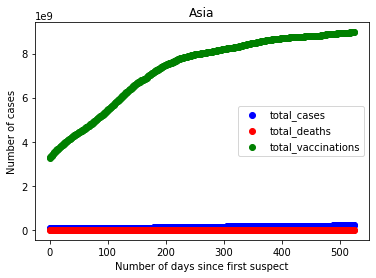

In [ ]:
for idx in range(0,len(countries)):
  C = df4[df4['Country']==countries[idx]].reset_index()
plt.scatter(np.arange(0,len(C)),C['total_cases'],color='blue',label="total_cases")
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='red',label="total_deaths")
plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color='green',label='total_vaccinations')
plt.title(countries[idx])
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

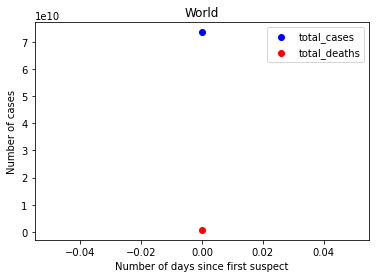

In [ ]:
df5 = df4.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index()

c = df5
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title("World")
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [ ]:
date = df4['Date'].unique()
len(date)


526

In [ ]:
df6 = df4.groupby(['Date'])[['Date','total_cases','total_deaths']].sum().reset_index()


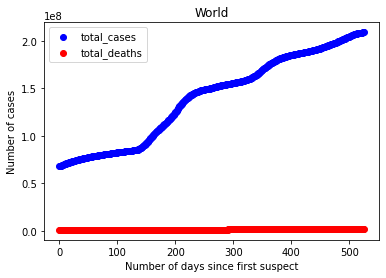

In [ ]:
c = df6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title('World')
plt.xlabel('Number of days since first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()